# Import Libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer
from scipy import stats
%matplotlib inline

# Load the dataset

In [2]:
df = pd.read_csv(r"C:\Users\lakshya sikri\Desktop\Laptops Unclean.csv")

In [3]:
df.head()

,Brand,Price,Rating,Ratings Count,Condition,Seller Note,Processor,Screen Size,Manufacturer Color,Color,...,Processor Speed,Type,Release Year,Maximum Resolution,Model,OS,Features,Hard Drive Capacity,Country Region Of Manufacture,Storage Type
0,CHUWI,$303.68,NaN,NaN,"New: A brand-new, unused, unopened, undamaged ...",NaN,Quad Core,14 in,NaN,Gray,...,Max up to 3.80 GHz,Notebook/Laptop,2021,2160 x 1440,CoreBook X,Windows 11 Home,"Backlit Keyboard, Built-in Microphone, Built...",512 GB SSD,China,SSD (Solid State Drive)
1,Dell,$399.99 to $634.99,NaN,NaN,Very Good - RefurbishedThe item shows minimal ...,“AAA PCs is a Microsoft Authorized Refurbisher...,Intel Core i7 8th Gen.,14 in,NaN,Black,...,4.20 GHz (1.90 GHz Base Frequency),Notebook/Laptop,Refurbished in 2023,1920 x 1080,Dell Latitude 7490,Windows 11 Pro,"Backlit Keyboard, Bluetooth, Built-in Micropho...",2 TB,NaN,SSD (Solid State Drive)
2,Dell,$175.00,NaN,NaN,UsedAn item that has been used previously. The...,"“Well kept, fully functional, includes battery...",Intel Core i5-6300U,14 in,NaN,Black,...,2.40 GHz,Notebook/Laptop,2019,1920 x 1080,Dell Latitude E5470,Windows 10 Pro,"10/100 LAN Card, Backlit Keyboard, Bluetooth, ...",500 GB,China,SSD (Solid State Drive)
3,HP,$84.99,NaN,NaN,Good - RefurbishedThe item shows moderate wear...,“1-Year Allstate warranty. The original HP cha...,Intel Celeron N,11.6 in,NaN,Black,...,2.40 GHz,Notebook/Laptop,NaN,1366 x 768,HP Chromebook 11 G6,Chrome OS,"Bluetooth, Built-in Microphone, Built-in Webca...",16 GB,NaN,eMMC
4,Dell,$101.22,NaN,NaN,Good - RefurbishedThe item shows moderate wear...,“Laptops is tested & fully working with some s...,Intel Core i5 6th Gen.,"Minimum 12.5""",NaN,NaN,...,Minimum 1.40 GHz,Notebook/Laptop,2015,1366 x 768,Various Models,Windows 10,"10/100 LAN Card, Built-in Microphone, Built-in...",NO HDD,NaN,SSD (Solid State Drive)


In [4]:
df.tail()

,Brand,Price,Rating,Ratings Count,Condition,Seller Note,Processor,Screen Size,Manufacturer Color,Color,...,Processor Speed,Type,Release Year,Maximum Resolution,Model,OS,Features,Hard Drive Capacity,Country Region Of Manufacture,Storage Type
6615,NaN,$108.06,NaN,NaN,"New: A brand-new, unused, unopened, undamaged ...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6616,NaN,"$2,108.99",NaN,NaN,Seller refurbished: The item has been restored...,NaN,NaN,NaN,NaN,Negro,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6617,NaN,$105.86,NaN,NaN,"New: A brand-new, unused, unopened, undamaged ...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6618,Lenovo,$567.74,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Black,...,NaN,Notebook/Laptop,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6619,NaN,$89.28,NaN,NaN,"New: A brand-new, unused, unopened, undamaged ...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Observation
The file named Unclean.csv and displays the initial five rows of the dataset, providing a glimpse into its structure and content. The dataset appears to contain information about laptops, including details such as brand, price, ratings, condition, seller notes, processor specifications, screen size, manufacturer, color, release year, and maximum resolution. 

# Data Cleaning

In [5]:
df.columns

Index(['Brand', 'Price', 'Rating', 'Ratings Count', 'Condition', 'Seller Note',
       'Processor', 'Screen Size', 'Manufacturer Color', 'Color', 'Ram Size',
       'SSD Capacity', 'GPU', 'Processor Speed', 'Type', 'Release Year',
       'Maximum Resolution', 'Model', 'OS', 'Features', 'Hard Drive Capacity',
       'Country Region Of Manufacture', 'Storage Type'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6620 entries, 0 to 6619
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Brand                          4024 non-null   object 
 1   Price                          6620 non-null   object 
 2   Rating                         286 non-null    object 
 3   Ratings Count                  286 non-null    float64
 4   Condition                      6004 non-null   object 
 5   Seller Note                    1442 non-null   object 
 6   Processor                      3837 non-null   object 
 7   Screen Size                    3890 non-null   object 
 8   Manufacturer Color             185 non-null    object 
 9   Color                          2149 non-null   object 
 10  Ram Size                       2112 non-null   object 
 11  SSD Capacity                   2780 non-null   object 
 12  GPU                            3088 non-null   o

# Fix Data Type Inconsistencies And Clean Unstructured Text

In [7]:
category_columns = ['Condition', 'Processor', 'Screen Size', 'GPU', 'Processor Speed', 'Type', 'Maximum Resolution', 
                    'Model', 'OS', 'Features', 'Country Region Of Manufacture', 'Storage Type', 'Color']

In [8]:
# category columns and convert to category
for column in category_columns:
    df[column] = df[column].astype('category')

In [9]:
df['Price'] = pd.to_numeric(df['Price'].replace('[\$,]', '', regex=True), errors='coerce')

In [10]:
# Columns to convert to numeric
numeric_columns = ['Rating', 'Ratings Count', 'Ram Size', 'SSD Capacity', 'Hard Drive Capacity', 'Release Year']

In [11]:
for column in numeric_columns:
    if df[column].dtype == 'object': 
        df[column] = df[column].str.replace('[^\d.]', '', regex=True)
    df[column] = pd.to_numeric(df[column], errors='coerce')  

# Observation
Data quality issues by handling data type inconsistencies and cleaning unstructured text. It identifies categorical columns and converts them to the appropriate categorical data type, optimizing memory usage. Numeric columns are also processed to ensure accurate data types, with non-numeric characters removed and potential conversions to numeric data types. Missing values are identified and their counts are reported, aiding in decision-making regarding imputation or removal strategies.

 # Handling Missing Values

In [12]:
df.isnull().sum()

Brand                            2596
Price                             117
Rating                           6334
Ratings Count                    6334
Condition                         616
Seller Note                      5178
Processor                        2783
Screen Size                      2730
Manufacturer Color               6435
Color                            4471
Ram Size                         4511
SSD Capacity                     3874
GPU                              3532
Processor Speed                  3951
Type                             3331
Release Year                     5845
Maximum Resolution               4140
Model                            3472
OS                               3580
Features                         4115
Hard Drive Capacity              5227
Country Region Of Manufacture    6417
Storage Type                     4232
dtype: int64

# Observation
This is handling of missing values within a dataset. It calculates the number of missing values in each column, providing insights into the extent of data missingness. Subsequently, it identifies numeric columns and imputes missing values in these columns with the median value. This approach is commonly employed for handling missing values in numeric data, as it helps maintain the data distribution while minimizing the impact of missing information. By addressing missing values, the code ensures that the dataset is more complete and suitable for subsequent analysis and modeling.










 # KNNImputer

In [13]:
# Handle numeric columns using KNNImputer
numeric_cols = ['Price', 'Release Year']
knn_imputer = KNNImputer(n_neighbors=2)
df[numeric_cols] = knn_imputer.fit_transform(df[numeric_cols])

In [14]:
# Handle category columns using simple imputer 
categorical_cols = ['Brand', 'Condition', 'Processor', 'Color', 'Type', 'Model', 'OS', 'Storage Type', 'GPU']
simple_imputer_cat = SimpleImputer(strategy='most_frequent')
df[categorical_cols] = simple_imputer_cat.fit_transform(df[categorical_cols])


# Observation
Addresses missing values in a dataset by utilizing two imputation techniques: KNNImputer and SimpleImputer. Numeric columns are imputed using KNNImputer, which replaces missing values with predictions based on the nearest neighbors. Categorical columns are imputed using SimpleImputer, which replaces missing values with the most frequent category. By effectively handling missing values in both numeric and categorical columns, the code enhances the completeness and quality of the dataset, making it suitable for further analysis and modeling.










In [15]:
df.head(10)

,Brand,Price,Rating,Ratings Count,Condition,Seller Note,Processor,Screen Size,Manufacturer Color,Color,...,Processor Speed,Type,Release Year,Maximum Resolution,Model,OS,Features,Hard Drive Capacity,Country Region Of Manufacture,Storage Type
0,CHUWI,303.680,NaN,NaN,"New: A brand-new, unused, unopened, undamaged ...",NaN,Quad Core,14 in,NaN,Gray,...,Max up to 3.80 GHz,Notebook/Laptop,2021.0,2160 x 1440,CoreBook X,Windows 11 Home,"Backlit Keyboard, Built-in Microphone, Built...",512.0,China,SSD (Solid State Drive)
1,Dell,433.495,NaN,NaN,Very Good - RefurbishedThe item shows minimal ...,“AAA PCs is a Microsoft Authorized Refurbisher...,Intel Core i7 8th Gen.,14 in,NaN,Black,...,4.20 GHz (1.90 GHz Base Frequency),Notebook/Laptop,2023.0,1920 x 1080,Dell Latitude 7490,Windows 11 Pro,"Backlit Keyboard, Bluetooth, Built-in Micropho...",2.0,NaN,SSD (Solid State Drive)
2,Dell,175.000,NaN,NaN,UsedAn item that has been used previously. The...,"“Well kept, fully functional, includes battery...",Intel Core i5-6300U,14 in,NaN,Black,...,2.40 GHz,Notebook/Laptop,2019.0,1920 x 1080,Dell Latitude E5470,Windows 10 Pro,"10/100 LAN Card, Backlit Keyboard, Bluetooth, ...",500.0,China,SSD (Solid State Drive)
3,HP,84.990,NaN,NaN,Good - RefurbishedThe item shows moderate wear...,“1-Year Allstate warranty. The original HP cha...,Intel Celeron N,11.6 in,NaN,Black,...,2.40 GHz,Notebook/Laptop,2015.5,1366 x 768,HP Chromebook 11 G6,Chrome OS,"Bluetooth, Built-in Microphone, Built-in Webca...",16.0,NaN,eMMC
4,Dell,101.220,NaN,NaN,Good - RefurbishedThe item shows moderate wear...,“Laptops is tested & fully working with some s...,Intel Core i5 6th Gen.,"Minimum 12.5""",NaN,Black,...,Minimum 1.40 GHz,Notebook/Laptop,2015.0,1366 x 768,Various Models,Windows 10,"10/100 LAN Card, Built-in Microphone, Built-in...",NaN,NaN,SSD (Solid State Drive)
5,Acer,49.990,4.55,193.0,"New: A brand-new, unused, unopened, undamaged ...",NaN,Intel Celeron,11.6 in,Black,Black,...,1.60 GHz,Laptop,2017.0,1366 x 768,Chromebook C738T-C44Z,Chrome OS,"Touchscreen, Bluetooth",NaN,NaN,SSD (Solid State Drive)
6,HP,39.590,4.55,23.0,"New: A brand-new, unused, unopened, undamaged ...",NaN,Intel Celeron,11.6 in,NaN,Black,...,1.60 GHz,Notebook/Laptop,2017.0,NaN,HP Chromebook 11 G5,Chrome OS,"Bluetooth, Built-in Webcam",16.0,NaN,SSD (Solid State Drive)
7,Acer,34.990,55.00,20.0,"New: A brand-new, unused, unopened, undamaged ...",NaN,Intel Celeron Dual-Core,11.6 inin,NaN,"Gray, Granite Gray",...,1.00 GHz.4ghz,Netbook,2019.0,NaN,Chromebook C720-2848,Chrome OS,NaN,16.0,NaN,SSD (Solid State Drive)
8,Dell,279.990,NaN,NaN,Excellent - Refurbished: The item is in like-n...,NaN,i7 7th,14 in,NaN,Black,...,2.80 GHz,Notebook/Laptop,2018.5,1920 x 1080,Dell Latitude 7480,win 11 pro,Wi-Fi,512.0,NaN,SSD (Solid State Drive)
9,HP,125.000,55.00,5.0,"New: A brand-new, unused, unopened, undamaged ...",NaN,Intel Core i3 10th Gen.,14 in,Mineral Silver,Silver,...,2.10 GHz,Notebook/Laptop,2020.0,1920 x 1080,Samsung Chromebook 3,Chrome OS,"Touchscreen, Bluetooth, Built-in Webcam, Wi-Fi...",NaN,NaN,eMMC


In [16]:
df.dtypes

Brand                              object
Price                             float64
Rating                            float64
Ratings Count                     float64
Condition                          object
Seller Note                        object
Processor                          object
Screen Size                      category
Manufacturer Color                 object
Color                              object
Ram Size                          float64
SSD Capacity                      float64
GPU                                object
Processor Speed                  category
Type                               object
Release Year                      float64
Maximum Resolution               category
Model                              object
OS                                 object
Features                         category
Hard Drive Capacity               float64
Country Region Of Manufacture    category
Storage Type                       object
dtype: object

In [17]:
# Add 'None' as a category only if it doesn't already exist, then fill missing values
for col in ['Seller Note', 'Features']:
    if df[col].dtype.name == 'category' and 'None' not in df[col].cat.categories:
        df[col] = df[col].cat.add_categories(['None'])
    df[col].fillna('None', inplace=True)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6620 entries, 0 to 6619
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   Brand                          6620 non-null   object  
 1   Price                          6620 non-null   float64 
 2   Rating                         286 non-null    float64 
 3   Ratings Count                  286 non-null    float64 
 4   Condition                      6620 non-null   object  
 5   Seller Note                    6620 non-null   object  
 6   Processor                      6620 non-null   object  
 7   Screen Size                    3890 non-null   category
 8   Manufacturer Color             185 non-null    object  
 9   Color                          6620 non-null   object  
 10  Ram Size                       2109 non-null   float64 
 11  SSD Capacity                   2746 non-null   float64 
 12  GPU                            662

In [19]:
# Handling missing values for numerical columns with median
num_cols_missing = ['Rating', 'Screen Size', 'GPU', 'Processor Speed', 
                    'Release Year', 'Maximum Resolution', 'Hard Drive Capacity','Ratings Count', 'Ram Size','SSD Capacity', 'Processor Speed']

# Fill missing values in numerical columns with median
for col in num_cols_missing:
    if df[col].dtype in ['float64', 'int64']: 
        df[col].fillna(df[col].median(), inplace=True)

In [20]:
# Handling missing values for categorical columns with mode
cat_cols_missing = ['Manufacturer Color', 'Country Region Of Manufacture']

# Fill missing values in categorical columns with mode
for col in cat_cols_missing:
    if df[col].dtype.name in ['category', 'object']:
        df[col].fillna(df[col].mode()[0], inplace=True)

# Observation
It identifies and handles missing values in both numerical and categorical columns. Numerical columns are filled with the median value, while categorical columns are filled with the mode. The final code snippet likely displays the cleaned dataset, which now includes columns like brand, price, rating, and specifications. 

# Price Column

In [21]:
# Convert to Numeric
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

# Convert to Integer
df['Price'] = df['Price'].astype(int)


# Converting Dtype

In [22]:
df['Release Year'] = df['Release Year'].astype(int)

# Dropping Columns

In [23]:
# List of columns to drop
cols_to_drop = ['Screen Size', 'GPU', 'Processor Speed', 'Maximum Resolution', 'Rating', 'Ratings Count']

# Drop the specified columns
df.drop(columns=cols_to_drop, inplace=True)

In [24]:
df.columns

Index(['Brand', 'Price', 'Condition', 'Seller Note', 'Processor',
       'Manufacturer Color', 'Color', 'Ram Size', 'SSD Capacity', 'Type',
       'Release Year', 'Model', 'OS', 'Features', 'Hard Drive Capacity',
       'Country Region Of Manufacture', 'Storage Type'],
      dtype='object')

# Observation
Converting the data type of the Release Year column to an integer type, dropping several columns that are not relevant for further analysis, and displaying information about the remaining columns in the dataset. These steps are essential for preparing the data for further analysis and modeling.

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6620 entries, 0 to 6619
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   Brand                          6620 non-null   object  
 1   Price                          6620 non-null   int32   
 2   Condition                      6620 non-null   object  
 3   Seller Note                    6620 non-null   object  
 4   Processor                      6620 non-null   object  
 5   Manufacturer Color             6620 non-null   object  
 6   Color                          6620 non-null   object  
 7   Ram Size                       6620 non-null   float64 
 8   SSD Capacity                   6620 non-null   float64 
 9   Type                           6620 non-null   object  
 10  Release Year                   6620 non-null   int32   
 11  Model                          6620 non-null   object  
 12  OS                             662

In [26]:
df.isnull().sum()

Brand                            0
Price                            0
Condition                        0
Seller Note                      0
Processor                        0
Manufacturer Color               0
Color                            0
Ram Size                         0
SSD Capacity                     0
Type                             0
Release Year                     0
Model                            0
OS                               0
Features                         0
Hard Drive Capacity              0
Country Region Of Manufacture    0
Storage Type                     0
dtype: int64

# Observation
Checking for missing values, identifying duplicated rows, and displaying column information. These steps are essential for understanding the data quality and preparing it for further analysis.

# Duplicated Values

In [27]:
duplicates = df.duplicated().sum()
print(f'Duplicates: {duplicates}')

Duplicates: 2794


No need to drop any duplicated

# Outliers
Outliers are data points that are significantly different from other data points in a dataset. They can be much larger or much smaller than the other data points in the dataset and can distort the overall analysis of the data.

There are different techniques to identify outliers, such as using boxplots, scatterplots, or mathematical methods such as the z-score or the interquartile range (IQR). Once outliers are identified, they can be dealt with by either removing them from the dataset, adjusting them to more reasonable values, or treating them as a separate category in the analysis.

In [28]:
# Statistics of the numerical columns in the DataFrame
df.describe()

,Price,Ram Size,SSD Capacity,Release Year,Hard Drive Capacity
count,6620.000000,6.620000e+03,6.620000e+03,6.620000e+03,6.620000e+03
mean,308.637462,1.319277e+03,1.938482e+06,2.655857e+04,6.010066e+06
std,397.508728,1.003603e+05,1.576342e+08,2.773994e+05,2.733854e+08
min,5.000000,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,91.000000,8.000000e+00,2.560000e+02,2.017000e+03,2.560000e+02
50%,197.000000,8.000000e+00,2.560000e+02,2.019000e+03,2.560000e+02
75%,384.000000,8.000000e+00,2.560000e+02,2.021000e+03,2.560000e+02
max,3901.000000,8.163264e+06,1.282565e+10,6.112021e+06,1.282565e+10


In [29]:
outlier_cols = ['Price', 'Ram Size','SSD Capacity', 'Hard Drive Capacity', 'Release Year']

In [30]:
import seaborn as sns

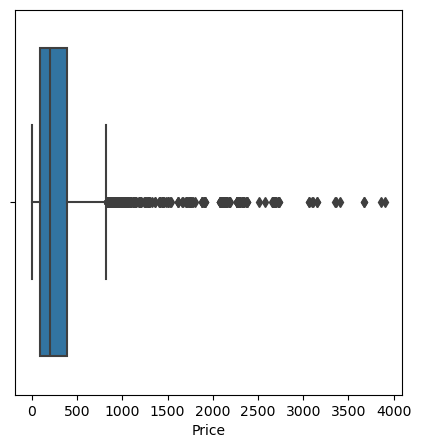

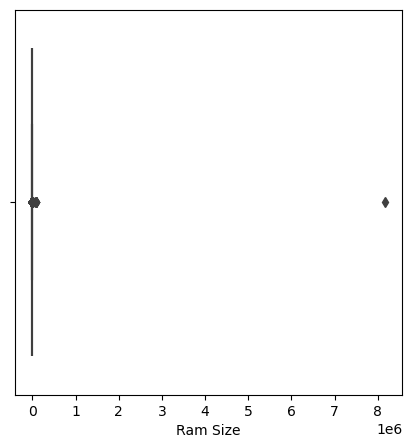

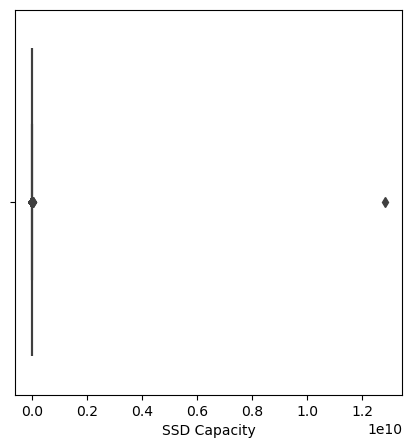

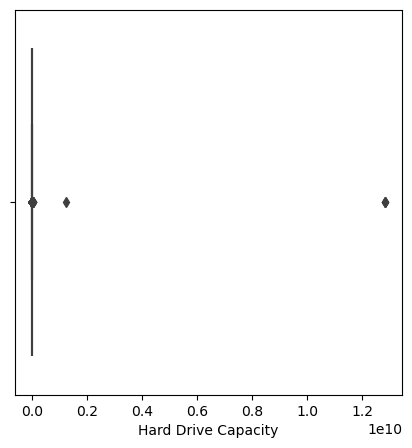

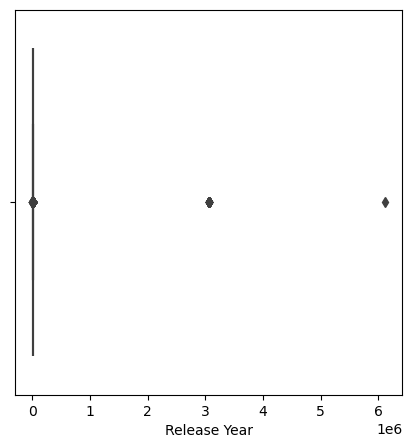

In [31]:
for col in outlier_cols:
    plt.figure(figsize=(5, 5))
    sns.boxplot(x=df[col])
    plt.show()

Now we see that there are indeed outliers in all of these columns.

# Z-score
We can also try a Z-score method to discover outliers. This method uses the standard deviation of the data to calculate the number of standard deviations a data point is away from the mean. A data point that falls outside a certain range (typically, outside 3 standard deviations from the mean) is considered an outlier.

Let's find outliers in all numerical columns.

In [32]:
# Select numeric columns
df_numeric = df.select_dtypes(include=[np.number])

# Loop through numeric columns to calculate Z-scores and count outliers
for col in df_numeric.columns:
    # Calculate the Z-scores of the column
    z_scores = np.abs(stats.zscore(df[col]))
    
    # Count the number of outliers
    outliers_num = len(np.where(z_scores > 3)[0])
    
    # Print the number of outliers if present
    if outliers_num:
        print('{}: {}'.format(col, outliers_num))

Price: 169
Ram Size: 1
SSD Capacity: 1
Release Year: 52
Hard Drive Capacity: 4


# Dealing with Outliers¶
There are several ways to deal with outliers in a dataset:

Remove the outliers: You can simply remove the rows containing outliers from your dataset. However, this can also lead to loss of information and affect the accuracy of your model. So, you should be careful while removing the outliers and make sure you have a valid reason for doing so.
Replace the outliers: You can replace the outliers with a value that makes more sense, for example, the mean, median, or mode of the data. This method can help preserve the data and still reduce the effect of outliers.
Transform the data: You can transform the data using techniques like log transformation, box-cox transformation, etc. This can help in reducing the effect of outliers and also improve the distribution of the data.

In [33]:
# Select numeric columns
df_numeric = df.select_dtypes(include=[np.number])

# Calculate Z-scores for all numeric columns
z_scores = np.abs(stats.zscore(df_numeric))

# Create a DataFrame without outliers
df_wo_outliers = df[(z_scores < 3).all(axis=1)]

# Print the shape of the DataFrame without outliers
print('Original DataFrame shape: {}'.format(df.shape))
print('DataFrame shape without outliers: {}'.format(df_wo_outliers.shape))

Original DataFrame shape: (6620, 17)
DataFrame shape without outliers: (6395, 17)


# Observation
Calculate Z-scores for numerical columns, which are then used to identify and remove outliers. The Z-score is a statistical measure that indicates how many standard deviations a data point is from the mean. Data points with Z-scores greater than 3 in absolute value are considered outliers and are removed from the dataset.

# Min Max Scaler

In [34]:
# Select only the numeric columns to apply normalization and standardization
df_numeric = df.select_dtypes(include=[np.number])

# 1. Normalization using MinMaxScaler (Scaling to range [0, 1])
min_max_scaler = MinMaxScaler()

# Normalize the numeric columns and convert them back to a DataFrame
df_normalized = pd.DataFrame(min_max_scaler.fit_transform(df_numeric), columns=df_numeric.columns)

# Display the first few rows of the normalized DataFrame
df_normalized.head()

,Price,Ram Size,SSD Capacity,Release Year,Hard Drive Capacity
0,0.076489,8.575002e-07,8.670126e-09,0.000331,3.992000e-08
1,0.109856,8.575002e-07,1.996000e-08,0.000331,1.559375e-10
2,0.043634,1.837501e-06,3.898438e-08,0.000330,3.898438e-08
3,0.020277,3.675001e-07,1.996000e-08,0.000330,1.247500e-09
4,0.024641,8.575002e-07,1.996000e-08,0.000330,1.996000e-08


# Observation
Min-Max scaling to normalize numerical features. Min-Max scaling is a technique that scales each feature to a specific range, typically between 0 and  This can be useful for improving the performance of machine learning models.

In [35]:
df_normalized.describe()

,Price,Ram Size,SSD Capacity,Release Year,Hard Drive Capacity
count,6620.000000,6.620000e+03,6.620000e+03,6620.000000,6.620000e+03
mean,0.077936,1.614890e-04,1.511410e-04,0.004345,4.685973e-04
std,0.102030,1.229414e-02,1.229054e-02,0.045386,2.131552e-02
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00
25%,0.022074,8.575002e-07,1.996000e-08,0.000330,1.996000e-08
50%,0.049281,8.575002e-07,1.996000e-08,0.000330,1.996000e-08
75%,0.097279,8.575002e-07,1.996000e-08,0.000331,1.996000e-08
max,1.000000,1.000000e+00,1.000000e+00,1.000000,1.000000e+00


# Standard Scaler

In [36]:
#Standardization using StandardScaler 
standard_scaler = StandardScaler()

# Standardize the numeric columns and convert them back to a DataFrame
df_standardized = pd.DataFrame(standard_scaler.fit_transform(df_numeric), columns=df_numeric.columns)

# Display the first few rows of the standardized DataFrame
df_standardized.head()

,Price,Ram Size,SSD Capacity,Release Year,Hard Drive Capacity
0,-0.014183,-0.013067,-0.012298,-0.088462,-0.021984
1,0.312878,-0.013067,-0.012297,-0.088455,-0.021986
2,-0.336213,-0.012987,-0.012295,-0.088470,-0.021984
3,-0.565156,-0.013107,-0.012297,-0.088484,-0.021985
4,-0.522386,-0.013067,-0.012297,-0.088484,-0.021985


In [37]:
 df_standardized.describe()

,Price,Ram Size,SSD Capacity,Release Year,Hard Drive Capacity
count,6.620000e+03,6.620000e+03,6.620000e+03,6.620000e+03,6.620000e+03
mean,2.361320e-17,-6.439964e-18,5.366637e-18,-1.502658e-17,-6.976628e-18
std,1.000076e+00,1.000076e+00,1.000076e+00,1.000076e+00,1.000076e+00
min,-7.639088e-01,-1.313643e-02,-1.229827e-02,-9.574848e-02,-2.198552e-02
25%,-5.475450e-01,-1.306668e-02,-1.229665e-02,-8.847683e-02,-2.198458e-02
50%,-2.808640e-01,-1.306668e-02,-1.229665e-02,-8.846962e-02,-2.198458e-02
75%,1.896014e-01,-1.306668e-02,-1.229665e-02,-8.846241e-02,-2.198458e-02
max,9.037874e+00,8.133255e+01,8.135723e+01,2.193920e+01,4.689574e+01


# Observation
Standardization using StandardScaler. StandardScaler is a technique used to transform numerical features to have a mean of 0 and a standard deviation of 1. This can be useful for improving the performance of machine learning models, especially when features have different scales.

In [38]:
df.head()

,Brand,Price,Condition,Seller Note,Processor,Manufacturer Color,Color,Ram Size,SSD Capacity,Type,Release Year,Model,OS,Features,Hard Drive Capacity,Country Region Of Manufacture,Storage Type
0,CHUWI,303,"New: A brand-new, unused, unopened, undamaged ...",None,Quad Core,Black,Gray,8.0,111.2,Notebook/Laptop,2021,CoreBook X,Windows 11 Home,"Backlit Keyboard, Built-in Microphone, Built...",512.0,China,SSD (Solid State Drive)
1,Dell,433,Very Good - RefurbishedThe item shows minimal ...,“AAA PCs is a Microsoft Authorized Refurbisher...,Intel Core i7 8th Gen.,Black,Black,8.0,256.0,Notebook/Laptop,2023,Dell Latitude 7490,Windows 11 Pro,"Backlit Keyboard, Bluetooth, Built-in Micropho...",2.0,China,SSD (Solid State Drive)
2,Dell,175,UsedAn item that has been used previously. The...,"“Well kept, fully functional, includes battery...",Intel Core i5-6300U,Black,Black,16.0,500.0,Notebook/Laptop,2019,Dell Latitude E5470,Windows 10 Pro,"10/100 LAN Card, Backlit Keyboard, Bluetooth, ...",500.0,China,SSD (Solid State Drive)
3,HP,84,Good - RefurbishedThe item shows moderate wear...,“1-Year Allstate warranty. The original HP cha...,Intel Celeron N,Black,Black,4.0,256.0,Notebook/Laptop,2015,HP Chromebook 11 G6,Chrome OS,"Bluetooth, Built-in Microphone, Built-in Webca...",16.0,China,eMMC
4,Dell,101,Good - RefurbishedThe item shows moderate wear...,“Laptops is tested & fully working with some s...,Intel Core i5 6th Gen.,Black,Black,8.0,256.0,Notebook/Laptop,2015,Various Models,Windows 10,"10/100 LAN Card, Built-in Microphone, Built-in...",256.0,China,SSD (Solid State Drive)


# Observation
The dataset has been cleaned and is now ready for further analysis. This means that it has been processed to ensure accuracy, consistency, and completeness. Common cleaning steps include handling missing values, detecting and addressing outliers, normalizing or standardizing data, converting data types, removing duplicates, and formatting data consistently. By cleaning your dataset, we can improve the quality and reliability of your analysis and modeling results.








